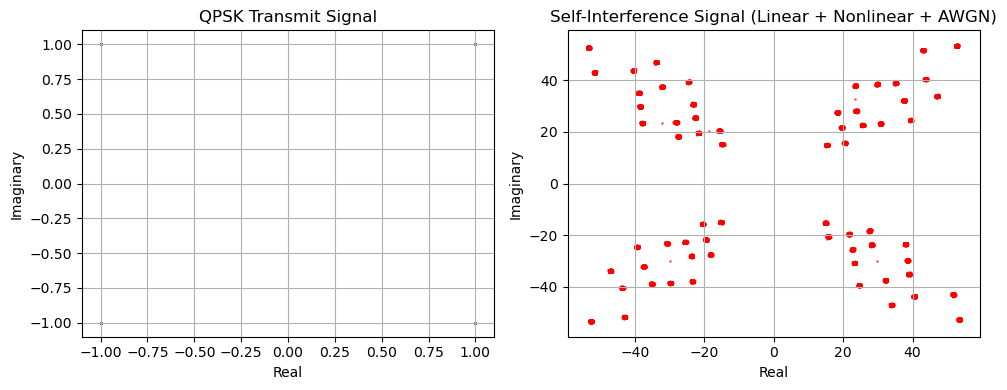

Data saved to self_interference_data_100000.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---------------------------
# 1. Generate QPSK signal
# ---------------------------
def generate_qpsk(num_samples):
    """
    Generate QPSK signal:
    - Map 2 bits per symbol to {±1 ± j}
    """
    bits = np.random.randint(0, 2, num_samples * 2)
    symbols = (2 * bits[0::2] - 1) + 1j * (2 * bits[1::2] - 1)
    return symbols

# ---------------------------
# 2. Apply multipath channel
# ---------------------------
def multipath_channel(signal):
    """
    Simulate a multipath channel:
    - Three paths with different delays and gains
    - Main path has stronger gain, others are weaker
    """
    taps = [
        (0, 5.0,  0.0),   # Main path (direct)
        (2, 0.8,  0.2),   # Delayed by 2 symbols
        (5, 0.4, -0.3)    # Delayed by 5 symbols
    ]
    output = np.zeros_like(signal, dtype=complex)
    N = len(signal)
    for delay, gain, phase in taps:
        tap_resp = gain * np.exp(1j * phase)  # Compute tap response
        delayed = np.roll(signal, delay)  # Apply delay
        delayed[:delay] = 0  # Avoid boundary issues
        output += tap_resp * delayed
    return output

# ---------------------------
# 3. Apply nonlinear distortion
# ---------------------------
def non_linear_distortion(signal, alpha=0.1):
    """
    Apply nonlinear distortion:
    - f(x) = x + α |x|² x
    - Default α = 0.1 (moderate nonlinearity)
    """
    return signal + alpha * (np.abs(signal) ** 2) * signal

# ---------------------------
# 4. Apply frequency offset (optional)
# ---------------------------
def apply_frequency_offset(signal, freq_offset=0, fs=20e6):
    """
    Apply frequency offset:
    - Default freq_offset = 0 (no frequency shift)
    - Used for carrier offset experiments
    """
    n = np.arange(len(signal))
    offset_signal = signal * np.exp(1j * 2 * np.pi * freq_offset * n / fs)
    return offset_signal

# ---------------------------
# 5. Add AWGN noise
# ---------------------------
def add_awgn(signal, snr_db=45):
    """
    Add Additive White Gaussian Noise (AWGN):
    - Default SNR = 45 dB (low noise impact)
    """
    sig_power = np.mean(np.abs(signal) ** 2)
    snr_lin = 10 ** (snr_db / 10)
    noise_power = sig_power / snr_lin
    noise = np.sqrt(noise_power / 2) * (np.random.randn(len(signal)) + 1j * np.random.randn(len(signal)))
    return signal + noise

# ---------------------------
# 6. Generate and process signals
# ---------------------------
num_samples = 100000
tx_signal = generate_qpsk(num_samples)  # Generate QPSK signal
si_linear = multipath_channel(tx_signal)  # Apply multipath channel
si_nonlinear = non_linear_distortion(si_linear, alpha=0.1)  # Apply nonlinear distortion
si_final = add_awgn(si_nonlinear, snr_db=45)  # Add Gaussian noise

# ---------------------------
# 7. Visualize signals
# ---------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(tx_signal.real, tx_signal.imag, s=1, alpha=0.5)
plt.title("QPSK Transmit Signal")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(si_final.real, si_final.imag, s=1, alpha=0.5, color='red')
plt.title("Self-Interference Signal (Linear + Nonlinear + AWGN)")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.grid(True)

plt.tight_layout()
plt.show()

# ---------------------------
# 8. Save data to CSV
# ---------------------------
df = pd.DataFrame({
    'tx_real': tx_signal.real,
    'tx_imag': tx_signal.imag,
    'si_real': si_final.real,
    'si_imag': si_final.imag
})
df.to_csv("self_interference_data_100000.csv", index=False)
print("Data saved to self_interference_data_100000.csv")
